### let's start with some imports

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
#import dataset 
ds = pd.read_csv('./datasets/Numerical_data_cleaned_for_first_sub.csv').drop(columns=['Unnamed: 0'])
ds.head(2)

,Lot Area,Year Built,Year Remod/Add,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Mo Sold,Yr Sold,Outdoor Liv Area,SalePrice
0,13517,1976,2005,1479,0.0,0.0,2,1,3,1,6,3,2010,44,130500
1,11492,1996,1997,2122,1.0,0.0,2,1,4,1,8,4,2009,74,220000


In [3]:
ds['Tot_bath_abv_grd'] = ds['Full Bath']+0.5*ds['Half Bath']
ds['Tot_bath_bsmt']=ds['Bsmt Full Bath']+0.5*ds['Bsmt Half Bath']

In [4]:
ds.head(2)

,Lot Area,Year Built,Year Remod/Add,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Mo Sold,Yr Sold,Outdoor Liv Area,SalePrice,Tot_bath_abv_grd,Tot_bath_bsmt
0,13517,1976,2005,1479,0.0,0.0,2,1,3,1,6,3,2010,44,130500,2.5,0.0
1,11492,1996,1997,2122,1.0,0.0,2,1,4,1,8,4,2009,74,220000,2.5,1.0


In [5]:
ds.columns

Index(['Lot Area', 'Year Built', 'Year Remod/Add', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Mo Sold', 'Yr Sold',
       'Outdoor Liv Area', 'SalePrice', 'Tot_bath_abv_grd', 'Tot_bath_bsmt'],
      dtype='object')

In [6]:
keepers = ['Lot Area', 'Year Built', 'Year Remod/Add', 'Gr Liv Area',
           'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Mo Sold', 'Yr Sold',
           'Outdoor Liv Area', 'SalePrice', 'Tot_bath_abv_grd', 'Tot_bath_bsmt']
ds_cleaned = ds[keepers]

In [7]:
ds_cleaned.isnull().sum()

Lot Area            0
Year Built          0
Year Remod/Add      0
Gr Liv Area         0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Mo Sold             0
Yr Sold             0
Outdoor Liv Area    0
SalePrice           0
Tot_bath_abv_grd    0
Tot_bath_bsmt       1
dtype: int64

In [8]:
ds_cleaned = ds_cleaned.dropna()

### now let's go ahead and try 4 models? regular MLR, Lasso, Ridge and if lasso>ridge or vice versa try ENet

#### Test/Train split & scaling! 

In [9]:
features = ['Lot Area', 'Year Built', 'Year Remod/Add', 'Gr Liv Area',
           'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Mo Sold', 'Yr Sold',
           'Outdoor Liv Area',  'Tot_bath_abv_grd', 'Tot_bath_bsmt']
X = ds_cleaned[features]
y = ds_cleaned['SalePrice']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

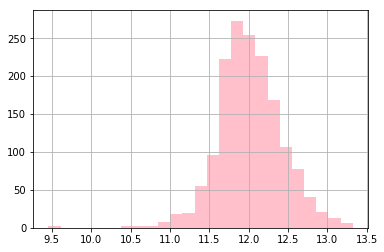

In [11]:
# transformation of y value is creating nicer predictions, probably due to assumptions math stuff
np.log(y_train).hist(color='pink',bins=25);

In [12]:
y_train_log = np.log(y_train)

In [13]:
ss = StandardScaler()
ss.fit(X_train)

X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

#### Linear Regression & Lasso & Ridge

In [14]:
# Linear regression first
lr = LinearRegression()
# then lasso & ridge 
lasso = LassoCV()
ridge = RidgeCV()

In [33]:
# cross_val_scores are sanity tests on how the data will perform on unseen data
print(cross_val_score(lr, X_train_ss,y_train_log, cv = 5))
print(cross_val_score(lr, X_train_ss,y_train_log,cv = 5).mean())

print(cross_val_score(lasso, X_train_ss,y_train_log, cv = 5))
print(cross_val_score(lasso, X_train_ss,y_train_log,cv = 5).mean())

print(cross_val_score(ridge, X_train_ss,y_train_log, cv = 5))
print(cross_val_score(ridge, X_train_ss,y_train_log,cv = 5).mean())

[0.73549216 0.75483973 0.8233106  0.79809831 0.83040829]
0.7884298163530595
[0.73546493 0.75509936 0.8240469  0.7973075  0.82866779]
0.788117297290986
[0.73551014 0.75490492 0.82338311 0.79802681 0.83035459]
0.7884359151283888


In [37]:
lr.fit(X_train_ss,y_train_log)

print(lr.score(X_train_ss,y_train_log))
# print(lr.score(X_test_ss,y_test))

0.7932052469105736


In [38]:
lr_pred = lr.predict(X_test_ss)
lr_pred = np.exp(lr_pred)
r2_score(y_test,lr_pred)

0.8327952365645946

In [39]:
lasso.fit(X_train_ss,y_train_log)

print(lasso.score(X_train_ss,y_train_log))
# print(lasso.score(X_test_ss,y_test))

0.7931493907830811


In [40]:
lasso_pred = lasso.predict(X_test_ss)
lasso_pred = np.exp(lasso_pred)
r2_score(y_test,lasso_pred)

0.8322006469413039

In [41]:
ridge.fit(X_train_ss,y_train_log)

print(ridge.score(X_train_ss,y_train_log))
# print(ridge.score(X_test_ss,y_test))

0.7932045757512414


In [51]:
ridge_pred = ridge.predict(X_test_ss)

array([12.34776939, 11.3711691 , 11.83362695, 11.88998673, 12.20087486,
       12.15939772, 12.23000716, 12.21563465, 12.59226257, 11.51383246,
       11.78441653, 12.37378818, 12.01467756, 12.02247867, 11.31346728,
       12.25176691, 12.4545406 , 11.94520749, 11.74143225, 11.7218187 ,
       11.40851393, 11.97321318, 12.16885826, 12.34009076, 11.63145423,
       12.49106439, 12.48563219, 11.35095032, 11.58953907, 11.19111392,
       11.52720977, 12.10098629, 11.72445531, 11.44753897, 11.80036751,
       11.55892051, 12.61912766, 11.59875521, 12.49128696, 11.57833077,
       12.08503412, 11.95534773, 11.52178151, 11.86020091, 12.13279764,
       11.77427257, 12.60568948, 12.20718495, 12.76662035, 11.62444904,
       12.27609737, 11.91292426, 12.46926014, 11.75788369, 11.69691124,
       11.60741895, 11.73941351, 11.71526664, 12.4139728 , 11.89940416,
       12.20519931, 12.07952707, 12.12977134, 12.96927306, 11.46366214,
       11.98340617, 11.69516522, 11.78601867, 11.37383644, 11.74

In [42]:
ridge_pred = np.exp(ridge_pred)
r2_score(y_test,ridge_pred)

0.8328078816895331

### now let's pull in test.csv and clean and create columns as I did for train set & make predictions

In [22]:
test_ds = pd.read_csv('./datasets/test.csv')

In [23]:
test_ds.head(2)
test_ds.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [24]:
test_ds = test_ds[['Id','Lot Area', 'Year Built', 'Year Remod/Add', 'Gr Liv Area',
                  'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
                  'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 
                   'Wood Deck SF','Open Porch SF','Screen Porch',
                   'Mo Sold', 'Yr Sold']]

test_ds['Tot_bath_abv_grd'] = test_ds['Full Bath']+0.5*test_ds['Half Bath']
test_ds['Tot_bath_bsmt']=test_ds['Bsmt Full Bath']+0.5*test_ds['Bsmt Half Bath']
test_ds['Outdoor Liv Area']=test_ds['Wood Deck SF']+test_ds['Open Porch SF']+test_ds['Screen Porch']

In [35]:
final_features = ['Id', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Gr Liv Area',
                  'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Mo Sold', 'Yr Sold',
                  'Outdoor Liv Area',  'Tot_bath_abv_grd', 'Tot_bath_bsmt']
final_test_ds = test_ds[final_features]

In [50]:
final_test_ds.shape

(879, 13)

In [36]:
final_test_ds.head(2)

,Id,Lot Area,Year Built,Year Remod/Add,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Mo Sold,Yr Sold,Outdoor Liv Area,Tot_bath_abv_grd,Tot_bath_bsmt
0,2658,9142,1910,1950,1928,4,2,9,4,2006,60,2.0,0.0
1,2718,9662,1977,1977,1967,6,2,10,8,2006,170,2.0,0.0


In [52]:
# just use ridge regression predictions on this set.
ridge_predictions = np.exp(ridge.predict(ss.transform(final_test_ds[features])))

In [ ]:
pd.DataFrame({
    'Id': test_ds['Id'],
    'SalePrice': ridge_predictions
})

In [55]:
pd.DataFrame({
    'Id': test_ds['Id'],
    'SalePrice': ridge_predictions
})
#.to_csv('katy_chow_submission_housing_proj2_20181130.csv', index=False)

### Trying elastic nets next
* Elastic net is not working well with more heavily weighted Ridge. testing (0.35,0.6) incrementing by 0.05
* cross_val_score.mean() not really budging which is great because then we know it is stable.

In [70]:
enet_alphas = np.arange(0, 1.0, 0.005)

# Set up our l1 ratio. (What does this do?)
enet_ratio = 0.6  # this will weight ridge more heavily 

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train_ss, y_train_log)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1224: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py

In [71]:
cross_val_score(enet_model,X_train_ss,y_train_log, cv=5).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1224: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py

0.7884298163530595